In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Stilleri Seaborn olarak ayarlama
sns.set
#KMeans modülünü içe aktarma
from sklearn.cluster import KMeans


In [2]:
#Verinin yüklenmesi
data = pd.read_csv('points.txt', delimiter="\t")

In [3]:
#Verinin incelenmesi
data

,x,y
0,0.12,0.29
1,0.57,0.19
2,0.60,0.57
3,0.06,0.28
4,0.06,0.42
...,...,...
95,0.48,0.22
96,0.11,0.57
97,0.65,0.69
98,0.55,0.42


Text(0, 0.5, 'y')

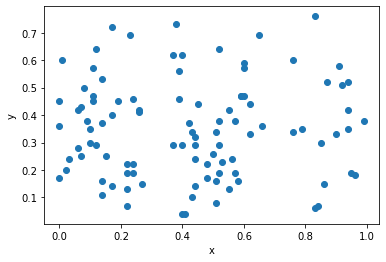

In [4]:
# İki değişkenin açılım grafiğini oluşturma
plt.scatter(data['x'], data['y'])
#Eksenleri isimlendirme
plt.xlabel('x')
plt.ylabel('y')

In [5]:
#Veri değişkeninin bir kopyasını oluşturarak her iki özelliği de seçiyoruz.
x=data.copy()

In [6]:
# Bir nesne oluşturalım buna kmeans diyelim
# Parantez içindeki sayı K, yani hedeflediğimiz küme sayısıdır.
kmeans=KMeans(5)

#datayı fit edelim(uyduralım)
kmeans.fit(x)


KMeans(n_clusters=5)

In [7]:
#input verilerinin bir kopyasını oluşturalım
clusters=x.copy()
#öngörülen kümeleri not edelim
clusters['kume_tahmin']=kmeans.fit_predict(x)

Text(0, 0.5, 'y')

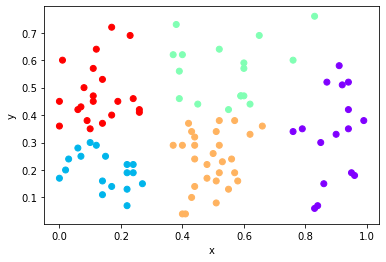

In [8]:
# c (color) bir değişkenle kodlanabilen bir argümandır
# bu durumda değişken, plt.scattera iki renk olduğunu 
# gösteren 0,1 değerlerine sahiptir. (0,1) Küme 0'daki tüm noktalar aynı renk
#Küme 1'deki noktalar başka renk oluyor.
# cmap renk haritasıdır
plt.scatter(clusters['x'], clusters['y'], c=clusters['kume_tahmin'], cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')

In [9]:
#standartlaştırma
from sklearn import preprocessing
# girdileri ölçeklendirelim(scale)
# preprocessing.scale her değişkeni(x'deki kolon) kendisine göre ölçeklendirir
# yeni sonuç bi dizidir
# standartlaştırmaverilerin ortalasından çıkartılıp standart sapm'ya bölünmesi

x_scaled= preprocessing.scale(x)
x_scaled


array([[-1.09263519, -0.34204835],
       [ 0.51208359, -0.91212894],
       [ 0.61906484,  1.25417729],
       [-1.30659769, -0.39905641],
       [-1.30659769,  0.39905641],
       [-0.98565393, -0.57008059],
       [-1.44923936, -0.85512088],
       [ 0.04849817, -0.62708865],
       [ 1.43925444,  2.33733041],
       [ 0.69038568, -0.11401612],
       [ 0.33378151,  1.6532337 ],
       [ 1.54623569, -1.14016117],
       [-1.16395602,  0.        ],
       [ 1.72453778,  1.31118535],
       [-1.1282956 ,  0.6840967 ],
       [ 0.33378151, -0.34204835],
       [-1.02131435, -1.36819341],
       [ 0.47642318, -0.62708865],
       [-1.52056019, -1.02614506],
       [ 0.51208359,  0.17102418],
       [ 1.51057528, -0.28504029],
       [ 1.7601982 ,  0.91212894],
       [ 2.00982112,  0.17102418],
       [ 0.29812109, -1.53921758],
       [-0.73603101, -1.25417729],
       [-1.16395602, -0.28504029],
       [ 0.29812109, -1.08315311],
       [ 0.58340443,  0.6840967 ],
       [ 1.18963152,

In [10]:
# K'yı seçmek
#boş liste oluşturmak (küme içi kareler toplaması)
kikt=[]

#olası tüm küme çözümlerini bir döngü ile oluşturma
# 1 ile 9 kümeden çözüm elde etmeyi seçtik; 
for i in range (1,10):
    kmeans=KMeans(i)
    #standartlaştırılış veriyi fit etme
    kmeans.fit(x_scaled)
    # yineleme değerini kikt'ye ekleme
    kikt.append(kmeans.inertia_)
    
#sonucu kontrol
kikt

[200.0,
 128.5641919324419,
 78.92744722983494,
 58.47842920389001,
 45.45015101783881,
 35.179486247076895,
 28.066186178910407,
 23.315000774090365,
 20.278989656929014]

Text(0, 0.5, 'Küme-içi Kareler Toplamı')

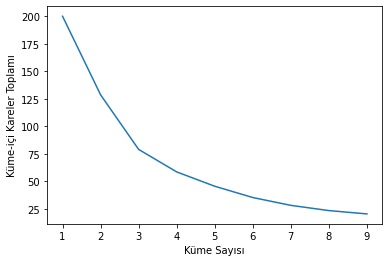

In [11]:
# küme sayısı ve kikt grafiğini çizdirme
plt.plot(range(1,10), kikt)
#eksenleri isimlendirme
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-içi Kareler Toplamı')
#with-in cluster sum of squares WCSS

#Elbow Yöntemi
# küme sayısına göre baktığımızda aslında 4 ten sonra bükülme oluyor gibi

In [12]:
kmeans_new=KMeans(5)

#datayı fit edelim(uyduralım)
kmeans_new.fit(x_scaled)
cluster_new= x.copy()
cluster_new['kume_tahmin']=kmeans_new.fit_predict(x_scaled)

In [13]:
cluster_new

,x,y,kume_tahmin
0,0.12,0.29,4
1,0.57,0.19,3
2,0.60,0.57,2
3,0.06,0.28,4
4,0.06,0.42,0
...,...,...,...
95,0.48,0.22,3
96,0.11,0.57,0
97,0.65,0.69,2
98,0.55,0.42,2


Text(0, 0.5, 'y')

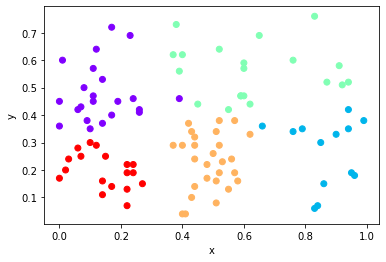

In [14]:
plt.scatter(cluster_new['x'], cluster_new['y'], c=cluster_new['kume_tahmin'], cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
